# Regressão Logística Binomial

A regressão logística é uma técnica estatística que relaciona uma variável categórica (dependente) com outras variáveis (independentes). Ou seja, estamos tentando entender uma variável categórica com base em outras variáveis (categóricas ou não).

O problema descrito acima é um problema de classificação. Problemas de regressão apresentam uma variável alvo que pode assumir valores em um intervalo; problemas de classificação apresentam uma variável alvo que pode assumir alguns valores apenas, chamados classes ou categorias.

**Observação:** Apesar do nome regressão logística, está técnica não é usada em problema de regressão e sim de classificação!

Em problemas de classificação podemos ter uma variável alvo binária (assume somente dois valores) ou multinomial (assume mais de dois valores).

Regressão logística é uma técnica linear usada em problemas de classificação binária (embora possa ser adaptado para problemas multinomiais). Se destaca por ser uma técnica relativamente simples e que permite alguma interpretação dos resultados.

Para ter uma melhor compreensão da regressão logística, vamos primeiro analisar o comportamento da função sigmóide.

A função sigmóide é definida por $$sigmoide(x) = \frac{1}{1 + e^{-x}}$$

Está função pode facilmente ser implementada em Python com o auxílio do pacote `numpy` para o cálculo da exponencial, conforme a seguir.

In [ ]:
import numpy as np

def sigmoide(x):
    return 1 / (1 + np.exp(-x))

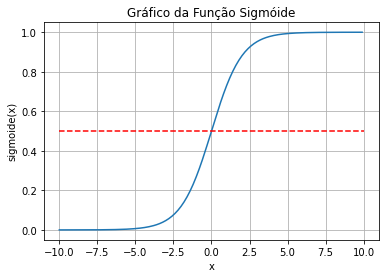

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

x = np.arange(-10,10,0.1)
sns.lineplot(x=x, y=sigmoide(x))
plt.grid()
plt.plot([-10, 10], [0.5, 0.5],'r--')
plt.xlabel('x')
plt.ylabel('sigmoide(x)')
plt.title('Gráfico da Função Sigmóide');

Note que se $x > 0$ então $sigmoide(x) > 0.5$ e quanto maior for o valor de $x$, mais $sigmoide(x)$ se aproxima de 1, isto é, $$\lim_{x \rightarrow \infty} sigmoide(x) = 1$$

Nota também que se $x < 0$ então $sigmoide(x) < 0.5$ e quanto menor for o valor de $x$, mais $sigmoide(x)$ se aproxima de 0, isto é, $$\lim_{x \rightarrow -\infty} sigmoide(x) = 0$$

Observação: O valor 0.5 é padrão mas pode ser alterado.

Por conta desse comportamento, a função sigmóide é muito boa para prever se uma variável deve ser classificada em 0 ou 1.

A função que usaremos para implementar a regressão logística é dada por $$p(x) = \frac{1}{1 + e^{-(b_0 + b_1 x_1 + \cdots + b_n x_n)}}$$

em que $x_1, \ldots, x_n$ são as variáveis utilizadas para prever $y$ e $b_0, b_1, \ldots, b_n$ são os coeficientes do modelos a serem estimados. 


Esses coeficientes devem ser tais que a função $p(x)$ obtenha a melhor taxa possível de classificação de $y$, dado $x$; isto, em geral, é feito maximizando a função de [log verossimilhança](https://pt.wikipedia.org/wiki/Fun%C3%A7%C3%A3o_de_verossimilhan%C3%A7a).

A função $p(x)$ é normalmente interpretada como a probabilidade de que $y$ seja 1, dado $x$. Consequentemente, $1-p(x)$ é a probabilidade de que $y$ seja 0, dado $x$.

Vejamos isso na prática!

Será que podemos estimar o `% de pobres` com base na `Porcentagem de Ativos`  e no `IDH` para o estado de Minas Gerais? Será que podemos obter alguma interpretação de tal modelo?

A variável `Porcentagem de Ativos` é a porcentagem da população em idade economicamente ativa (entre 25 e 64 anos).

Nós já lidamos com esse problema na parte de regressão linear, vejamos outra abordagem possível.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('Fonte dos Dados.xlsx')
df.head()

,nomeLocalidade,estado,População residente,Densidade demográfica,Porcentagem de Jovens,Porcentagem de Ativos,Porcentagem de Idosos,Taxa de Urbanização,Taxa de Saneamento Básico,Ativos com Baixo Nível Educacional,...,Percentual de empresas do setor terciário em relação ao total,Percentual de trabalhadores do setor primário em relação ao total,Percentual de trabalhadores do setor secundário em relação ao total,Percentual de trabalhadores do setor terciário em relação ao total,Média Salarial,Produtividade,Taxa de desemprego dos jovens,Taxa de desemprego,"Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes","Número de ativos culturais e de lazer por 10,000 habitantes"
0,Acrelândia,Acre,12538.0,6.93,52.92,43.04,4.04,48.34,0.00,75.34,...,75.41,8.86,21.53,34.07,994.67,2654247.23,19.17,9.62,12.12,0.0
1,Assis Brasil,Acre,6072.0,1.22,55.58,40.07,4.35,65.30,2.39,66.83,...,100.00,0.60,0.00,36.25,1163.49,2113108.99,10.57,7.44,17.79,0.0
2,Brasiléia,Acre,21398.0,5.46,51.88,42.76,5.37,70.02,21.27,70.67,...,83.85,2.53,17.70,33.83,818.65,2376384.22,11.13,5.96,14.58,0.0
3,Bujari,Acre,8471.0,2.79,52.71,42.60,4.69,44.07,0.16,71.05,...,53.33,31.34,1.04,29.40,897.30,2668575.85,9.76,3.41,5.78,0.0
4,Capixaba,Acre,8798.0,5.17,53.92,41.92,4.16,44.60,0.82,77.90,...,62.50,4.30,30.37,10.32,843.49,2803488.37,6.35,4.14,7.73,0.0


Vamos selecionar apenas as variáveis `Porcentagem de Ativos` e `% de pobres` para o estado de Minas Gerais.

In [ ]:
# separando os dados apenas para o estado de Minas Gerais
df = df[df['estado'] == 'Minas Gerais'].reset_index()

In [ ]:
# selecionando apenas as variáveis de interesse
df = df[['Porcentagem de Ativos', 'IDH', '% de pobres']]
df.head()

,Porcentagem de Ativos,IDH,% de pobres
0,55.83,0.84,7.94
1,52.61,0.85,6.69
2,50.31,0.82,23.33
3,48.35,0.82,26.53
4,45.88,0.84,30.70


In [ ]:
# verificando a correlação linear
df.corr()

,Porcentagem de Ativos,IDH,% de pobres
Porcentagem de Ativos,1.000000,0.650718,-0.831380
IDH,0.650718,1.000000,-0.721518
% de pobres,-0.831380,-0.721518,1.000000


Vamos observar a distribuição aproximada da variável `% de pobres`.

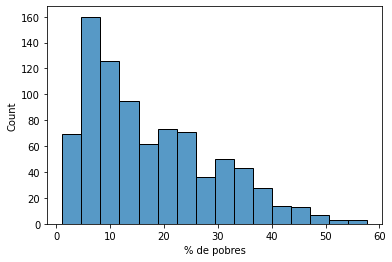

In [ ]:
sns.histplot(df['% de pobres']);

Podemos ver que está distribuição não é simétrica e apresenta poucos valores na cauda direita. Portanto vamos considerar a mediana como uma medida separatriz para essa variável.

In [ ]:
# cálculo da mediana
df['% de pobres'].median()

14.09

Agora precisamos criar uma variável categórica dicotômica para a variável `% de pobres`. Faremos isso da seguinte forma: se o valor for menor que a mediana, iremos atribuir o valor 0, caso contrário iremos atribuir 1.

Ao fazer isso estamos considerando que 1 significa alta porcentagem de pobres, indicando municípios que precisariam de maior atenção em alguma política pública, por exemplo.

Primeiramente, vamos descobrir quais municípios possuem porcentagem de pobres maior que 14.09 ou, mais precisamente, quais índices indicam tais municípios.

In [ ]:
indice = df[df['% de pobres'] >= 14.09].index.tolist()
#indice

Agora vamos criar a variável categórica `% de pobres categórica` com todos os valores iguais a 0 e, posteriormente, preencher com 1 nos índices obtidos acima.

In [ ]:
# criando a variável com todos os valores iguais a 0
df['% de pobres categórica'] = 0

In [ ]:
# trocando os valores do índice para 1
df.iloc[indice, -1] = 1
df.head()

,Porcentagem de Ativos,IDH,% de pobres,% de pobres categórica
0,55.83,0.84,7.94,0
1,52.61,0.85,6.69,0
2,50.31,0.82,23.33,1
3,48.35,0.82,26.53,1
4,45.88,0.84,30.70,1


Poderíamos fazer a classificação dos grupos usando outras técnicas, como agrupamento.

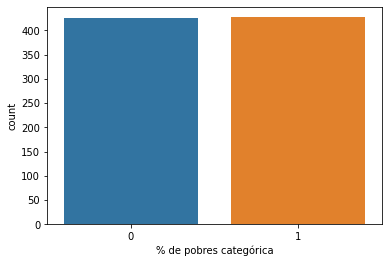

In [ ]:
sns.countplot(x=df['% de pobres categórica']);

Não vamos precisar balancear as classes.

In [ ]:
# separando as variáveis dependente e independente
X = df[['Porcentagem de Ativos', 'IDH']]
y = df['% de pobres categórica']

Vamos usar a biblioteca `statsmodels` para criar o modelo de regressão logística, embora isso também pudesse ser feito com o `scikit-learn`.

In [ ]:
# importando o statsmodels para criar o modelo de regressão logística
import statsmodels.api as sm

Assim como na regressão linear, temos que adicionar uma constante à variável X.

In [ ]:
X = sm.add_constant(X)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# criando modelo de regressão logística
modelo = sm.Logit(y, X).fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.353334
         Iterations 7


Agora, podemos ver os parâmetros estimados.

In [ ]:
modelo.params

const                    62.300061
Porcentagem de Ativos    -0.511505
IDH                     -44.229798
dtype: float64

Também conseguimos fazer previsões. Para o modelo de regressão logística do `statsmodels` a previsão retornará apenas a probabilidade de se estar na categoria 1. Precisamos fazer um pequeno tratamento para obtermos apenas 0 ou 1.

In [ ]:
modelo.predict(X)

0      0.031975
1      0.099253
2      0.573906
3      0.785895
4      0.842795
         ...   
848    0.856175
849    0.983991
850    0.105358
851    0.460799
852    0.127659
Length: 853, dtype: float64

In [ ]:
y_pred = (modelo.predict(X) >= 0.5).astype(int)

Podemos também obter algumas informações do modelos com o método `summary()`.

In [ ]:
print(modelo.summary())

                             Logit Regression Results                             
Dep. Variable:     % de pobres categórica   No. Observations:                  853
Model:                              Logit   Df Residuals:                      850
Method:                               MLE   Df Model:                            2
Date:                    Tue, 21 Feb 2023   Pseudo R-squ.:                  0.4902
Time:                            16:54:46   Log-Likelihood:                -301.39
converged:                           True   LL-Null:                       -591.25
Covariance Type:                nonrobust   LLR p-value:                1.304e-126
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    62.3001      4.494     13.864      0.000      53.492      71.108
Porcentagem de Ativos    -0.5115      0.050    -10.216      0.000 

Com base nos valores estimados temos que nosso modelo é

$$p(x) = \frac{1}{1 + e^{-(62.3 - 0.5 x_1 - 44.2 x_2)}}$$

Ainda, pela tabela nós temos uma coluna, chamada `P>|z|`, que indica o p-valor associado à importância da constante e da variável. Como este valor é menor que 0.05 podemos considerar que ambos os coeficientes $b_0$, $b_1$ e $b_2$ são diferentes de 0. Logo as variáveis `x_1` e `x_2` são relevantes para tentar prever $y$.

## Interpretando o Coeficiente $b_1$

Para obter uma interpretação vamos examinar a razão de chances (odds ratio - OR) de a previsão usando o modelo pertencer à classe 0 ou à classe 1. Isto é,

$$OR = \frac{\frac{p(1)}{1-p(1)}}{\frac{p(0)}{1-p(0)}} = \frac{\frac{e^{b_0+b_1}}{1-e^{b_0+b_1}}}{\frac{e^{b_0}}{1-e^{b_0}}} = e^{b_1}$$

E o que isso significa?

Por exemplo, se $y$ é a presença de cancêr e $x_1$ indica se a pessoa é fumante, então $OR=2$ pode ser interpretado como a chance de um fumante desenvolver cancêr de pulmão é duas vezes maior do que as chances de uma pessoa não fumante.

No nosso caso, $b_1 = -0.5$, indicando que um aumento na `Porcentagem de Ativos` está associado a uma diminuição na `% de pobres` (pois o sinal é negativo) e a cada aumento de uma unidade na variável `Porcentagem de Ativos`, há uma diminuição de 0.5 vezes na variável `% de pobres`.

## Como medir a performance da regressão logística?

Em problemas de classificação binária temos 4 possibilidade:

* Verdadeiro positivo (VP): prever casos positivos corretamente;

* Verdadeiro negativo (VN): prever casos negativos corretamente;

* Falso positivo (FP): perver casos positivos incorretamente;

* Falso negativo (FN): prever casos negativos incorretamente;


Claramente a função (ou modelo) acerta com verdadeiro positivo e verdadeiro negativo, mas erra com falso positivo e falso negativo.

Há várias formas de avaliar a performance de um modelo, e todas elas se baseiam no acertos ou erros que o modelo cometeu. Para facilitar, vamos criar uma tabela, conhecida como tabela (ou matriz) de confusão:

<table>
<thead>
  <tr>
    <th></th>
    <th colspan="2">preditos</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td rowspan="2">observados</td>
    <td>VP</td>
    <td>FN</td>
  </tr>
  <tr>
    <td>FP</td>
    <td>VN</td>
  </tr>
</tbody>
</table>


* **Acurácia:** é o número total de acertos dividido pelo número total de observações. Isto é, $\frac{VP + VN}{VP + VN + FP + FN}$

* **Valores Positivos Preditos ou Precision:** é o número de verdadeiro positivos dividido pelo total de positivos observados. Isto é, $\frac{VP}{VP + FP}$

* **Valores Negativos Preditos:** é o número de verdadeiro negativos dividido pelo total de negativos observados. Isto é, $\frac{VN}{VN + FN}$

* **Sensitividade ou Recall:** é o número de verdadeiro positivos dividido pelo total de verdadeiros preditos. Isto é, $\frac{VP}{VP + FN}$

* **Especificidade:** é o número de verdadeiro negativos dividido pelo total de negativos preditos. Isto é, $\frac{VN}{VN+FP}$.

* **f1-score:** é uma média harmônica entre sensitividade e especificidade.


Podemos montar a matriz de confusão usando a função `confusion_matrix` do módulo `metrics` do `scikit-learn`.

In [ ]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y, y_pred)
matriz_confusao

array([[368,  58],
       [ 76, 351]])

Essa visualização da matriz de confusão não é muito agradável, então vamos usar um mapa de calor.

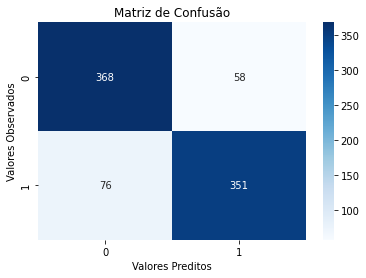

In [ ]:
# criando mapa de calor
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Valores Observados')
plt.xlabel('Valores Preditos');

Também podemos obter o mapa de calor observando os valores percentuais.

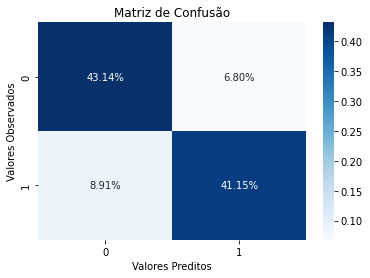

In [ ]:
sns.heatmap(matriz_confusao/np.sum(matriz_confusao),
            annot=True, fmt='.2%', cmap='Blues');
          
plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Valores Observados')
plt.xlabel('Valores Preditos');

Para observar as outras métricas, podemos usar a função `classification_report` do módulo `metrics` do `scikit-learn`.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       426
           1       0.86      0.82      0.84       427

    accuracy                           0.84       853
   macro avg       0.84      0.84      0.84       853
weighted avg       0.84      0.84      0.84       853



Podemos ver que a acurária é de 84%, indicando que o modelo acerta 84% da previsões. Note também que ele se sai razoavelmente bem nas duas categorias, indicando que o modelo está bom.

Outra métrica é área sob a curva ROC. Podemos obter essa métrica e criar um gráfico da curva ROC com as funções `roc_curve` e `roc_auc_score` do módulo `metrics` do `scikit-learn`.

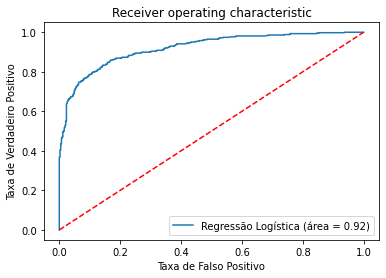

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

logit_roc_auc = roc_auc_score(y, modelo.predict(X))
fpr, tpr, thresholds = roc_curve(y, modelo.predict(X))
plt.plot(fpr, tpr, label=f'Regressão Logística (área = {round(logit_roc_auc, 2)})')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right");

Quanto mais próximo de 1 a área sob a curva ROC estiver, melhor o modelo. No nosso caso a área é de 0.92, indicando que o modelo está bom.

Vantagens

* Não pe computacional caro

* Fácil de implementar e interpretar

* Não precisa mudar a escala das variáveis


Desvantagens

* Não consegue lidar com variáveis categóricas que tenham muitas classes.

* É vulnerável ao overfitting

* Não consegue resolver problemas não linear sem uma transformação das variáveis.

* Não funciona bem com variáveis que não estejam correlacionadas com a variável alvo ou que se houver multicolinearidade entre as variáveis independentes.